<a href="https://colab.research.google.com/github/eve-okorie16/testrep/blob/main/Copy_of_crowdfunding_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To determine the market campaign for crowdfunding

In [ ]:
pip install seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the csv file as dataframe
df = pd.read_csv("crowdfunding.csv")
df

,category,device,gender,age,amount
0,Fashion,iOS,F,45-54,61
1,Sports,android,M,18-24,31
2,Technology,android,M,18-24,39
3,Technology,iOS,M,18-24,36
4,Sports,android,M,18-24,40
...,...,...,...,...,...
3995,Fashion,iOS,M,18-24,53
3996,Fashion,iOS,F,35-44,47
3997,Fashion,iOS,F,18-24,35
3998,Environment,android,F,18-24,39


In [ ]:
df.head()

,category,device,gender,age,amount
0,Fashion,iOS,F,45-54,61
1,Sports,android,M,18-24,31
2,Technology,android,M,18-24,39
3,Technology,iOS,M,18-24,36
4,Sports,android,M,18-24,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4000 non-null   object
 1   device    4000 non-null   object
 2   gender    4000 non-null   object
 3   age       4000 non-null   object
 4   amount    4000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 156.4+ KB


In [ ]:
#to crosscheck null values
df.isnull().sum()

category    0
device      0
gender      0
age         0
amount      0
dtype: int64

In [ ]:
#to check for duplicate values
df.duplicated()
#duplicated values if true is relevant so no drop duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
3995     True
3996    False
3997     True
3998     True
3999     True
Length: 4000, dtype: bool

In [ ]:
df['category'].value_counts()

Games          817
Sports         807
Technology     799
Environment    795
Fashion        782
Name: category, dtype: int64

In [ ]:
# To show the top categories based on amount contributed
df.groupby(['category']).sum('amount')

,amount
category,
Environment,31869
Fashion,30025
Games,32764
Sports,31581
Technology,31093


In [ ]:
#to understand this data more
df.describe()

,amount
count,4000.000000
mean,39.333000
std,14.914547
min,1.000000
25%,29.000000
50%,39.000000
75%,49.000000
max,101.000000


In [ ]:
#to determine device with the highest contribution
df.groupby(['device']).sum('amount')

,amount
device,
android,54901
iOS,102431


In [ ]:
# frequency of the age
df['age'].value_counts()

18-24    2040
35-44     510
55+       499
45-54     488
25-34     463
Name: age, dtype: int64

In [ ]:
#to determine highest age bracket that contribute most
df.groupby(['age']).sum('amount')

,amount
age,
18-24,80138
25-34,18208
35-44,20218
45-54,19276
55+,19492


<AxesSubplot:xlabel='age', ylabel='count'>

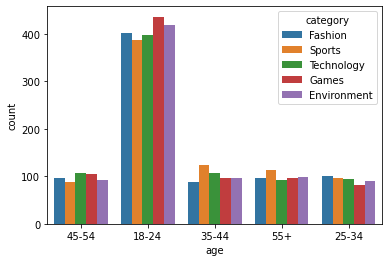

In [ ]:
df = pd.read_csv("crowdfunding.csv")
sns.countplot(data=df, x="age", hue="category")

In [ ]:
 df.groupby(["amount", "gender"]).value_counts()

amount  gender  category     device   age  
1       F       Fashion      android  18-24    2
                Sports       iOS      55+      2
                Games        iOS      35-44    2
                Environment  android  55+      1
                Sports       iOS      25-34    1
                                              ..
86      F       Technology   iOS      18-24    1
        M       Games        android  35-44    1
89      F       Games        iOS      18-24    1
90      U       Sports       iOS      55+      1
101     F       Technology   iOS      35-44    1
Length: 2666, dtype: int64

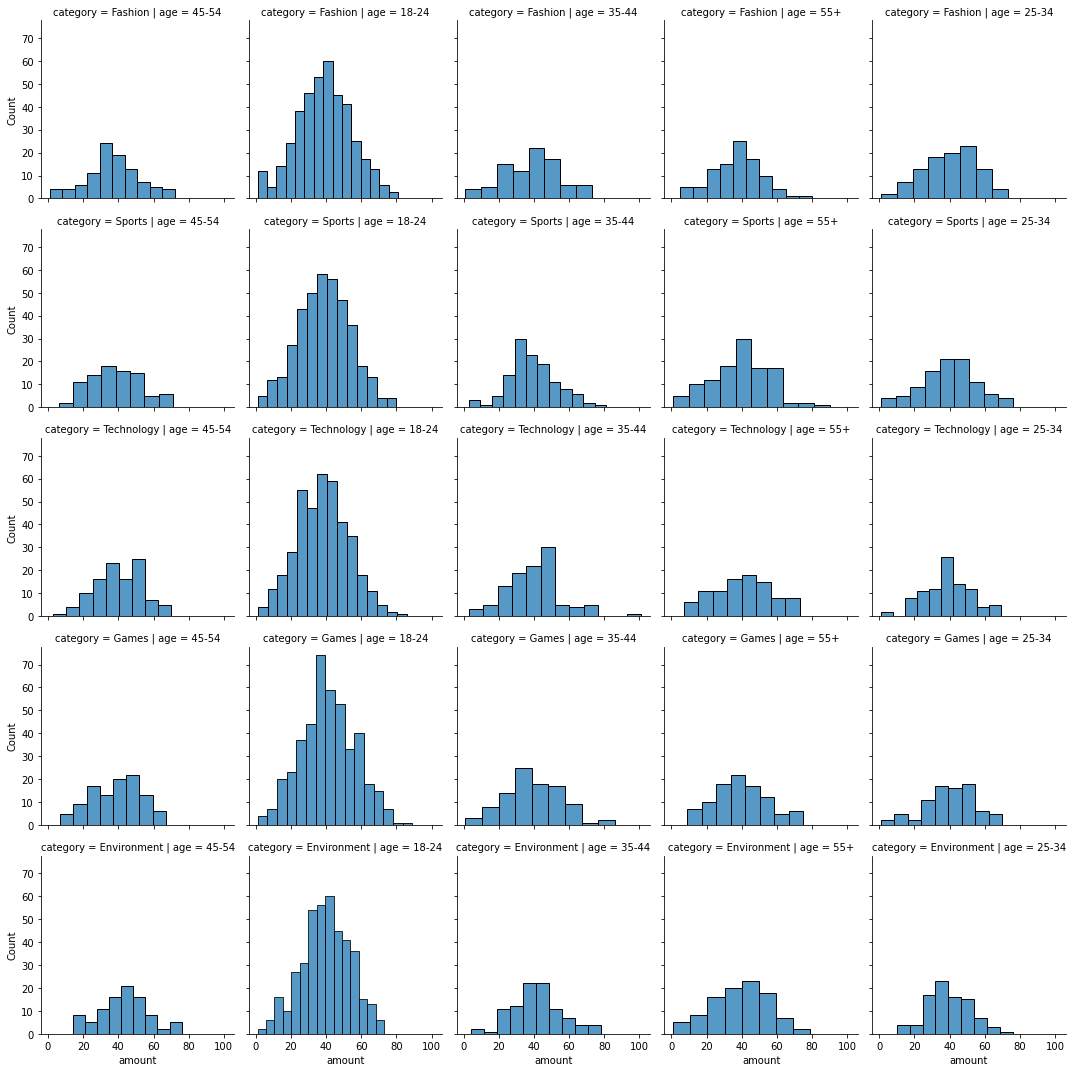

In [ ]:
g = sns.FacetGrid(df, row="category", col="age")
g.map(sns.histplot, "amount")
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

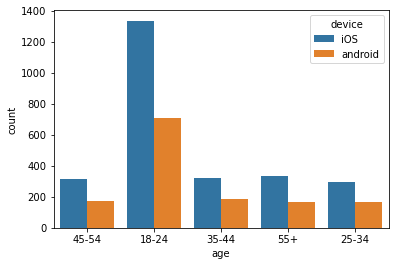

In [ ]:
sns.countplot(data=df, x="age", hue="device")

<AxesSubplot:xlabel='amount', ylabel='count'>

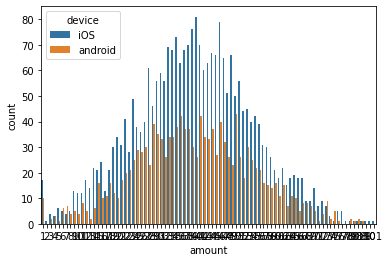

In [ ]:
sns.countplot(data=df, x="amount", hue="device")

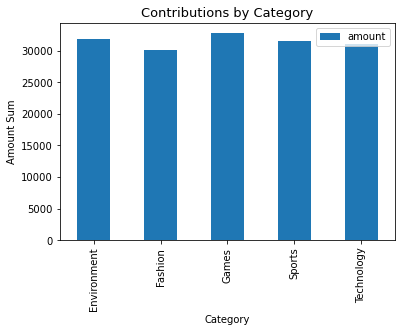

In [ ]:
sum_amount_category = df.groupby(['category']).sum('amount')
sum_amount_category.plot(kind="bar")
plt.xlabel("Category", fontsize=10)
plt.ylabel("Amount Sum", fontsize=10)
plt.title("Contributions by Category", fontsize=13)
plt.show()

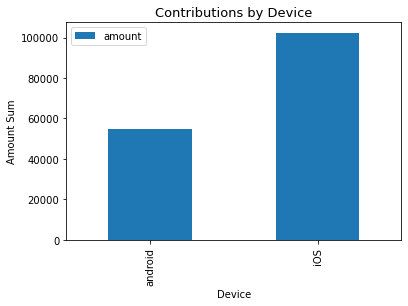

In [ ]:
sum_amount_device = df.groupby(['device']).sum('amount')
sum_amount_device.plot(kind="bar")
plt.xlabel("Device", fontsize=10)
plt.ylabel("Amount Sum", fontsize=10)
plt.title("Contributions by Device", fontsize=13)
plt.show()

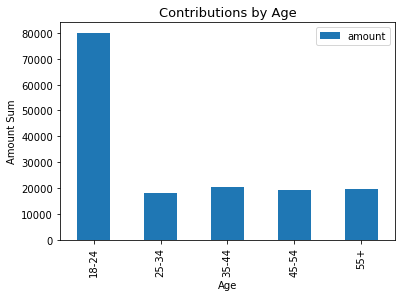

In [ ]:
sum_amount_age = df.groupby(['age']).sum('amount')
sum_amount_age.plot(kind="bar")
plt.xlabel("Age", fontsize=10)
plt.ylabel("Amount Sum", fontsize=10)
plt.title("Contributions by Age", fontsize=13)
plt.show()

In [ ]:
df1 = sum_amount_category
df2 = sum_amount_device
df3 = sum_amount_age

C:\Users\Dr. Okorie\AppData\Local\Temp\ipykernel_3092\1820169326.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(h_pad=60, w_pad=20)


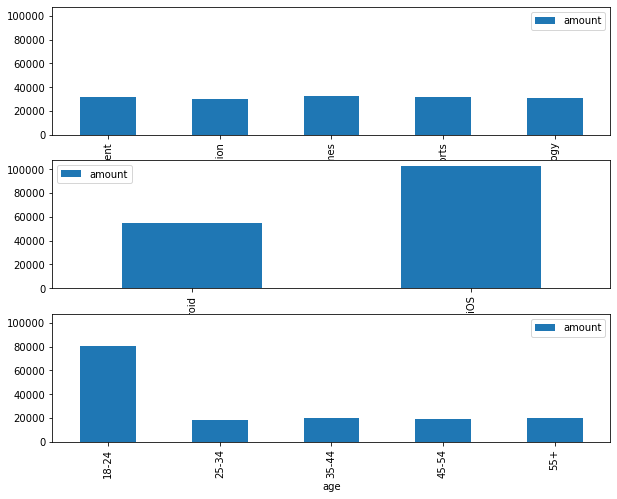

In [ ]:
#using subplot to get a visualization 
#defining the subplot layout
fig, axes = plt.subplots(nrows=3, ncols=1,sharey=True,figsize=(10,8))
#add dataframes to subplots
df1.plot.bar(ax=axes[0])
df2.plot.bar(ax=axes[1])
df3.plot.bar(ax=axes[2])
fig.tight_layout(h_pad=60, w_pad=20)
plt.show()

From the datasets gotten, it can be seen that the amount of contributions was made more with people who are interested in games, environment and sports.
Those who own an iphone made more contributions within that period and the people within the age range of 18 and 24 made the highest contributions across all categories.(Refer to the Facetgrid)
So, it can be inferred from our results that those who fall within 18 and 24 years old were more likely going to contribute towards the  crowdfunding irrespective of their interests and device although those who  used IOS devices made more contributions than those who use android devices.
Reasons can be that young people has more awareness and social influence since creators rely heavily on social media amongst young people. There is also the need for personal and societal validation. Some also actively contribute to get rewards.

CONCLUSION: We can recommend that the next crowdfunding campaign be targetted at young people between age 18-24 who has  interest in all categories especially, in games, environment or sports and who also uses IOS devices.